<a href="https://colab.research.google.com/github/Moamen189/Decision_Tree_Regression/blob/main/Decision_Tree_RegressionII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predecting Mobile Prices using Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Mobile phone price.csv')
X = dataset['Model'].values
y = dataset['Price ($)'].values

dataset.head(5)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


# Data Preprocessing


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

## Training the Decision Tree Regression model on the training set

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import re

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(handle_unknown='ignore')

# Encode the categorical variables in your dataset
X_train_encoded = encoder.fit_transform(X_train.reshape(-1, 1))

# Preprocess the target variable
y_train_processed = np.array([re.sub('[^\d.]', '', price) for price in y_train]).astype(float)
y_train_encoded = y_train_processed.reshape(-1, 1)

# Create an instance of the DecisionTreeRegressor class
regressor = DecisionTreeRegressor()

# Fit the model to the encoded dataset
regressor.fit(X_train_encoded, y_train_encoded)


DecisionTreeRegressor()

## Predicting the Results

In [7]:
X_test_encoded = encoder.transform(X_test.reshape(-1, 1))
y_pred = regressor.predict(X_test_encoded)
y_pred

array([ 199.        ,  149.        ,  199.        ,  229.        ,
        899.        ,  299.        , 1099.        ,  226.5       ,
        149.        ,  299.        ,  199.        ,  145.66666667,
        199.        ,  199.        ,  449.        ,  149.        ,
        799.        ,  199.        ,  199.        ,  201.5       ,
        199.        ])

## Comparing the Real Values with Predicted Values

In [8]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,$299,199.000000
1,$139,149.000000
2,$329,199.000000
3,179,229.000000
4,$899,899.000000
5,299,299.000000
6,1099,1099.000000
7,$269,226.500000
8,$149,149.000000
9,299,299.000000


## Visualising the Decision Tree Regression Results

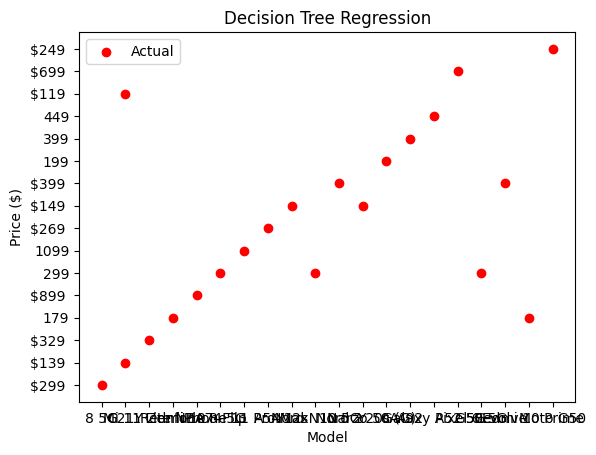

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define X_grid
X_grid = np.arange(len(X_test)).reshape((-1, 1))

# Visualize the Decision Tree Regression Results
plt.scatter(X_test, y_test, color='red', label='Actual')
#plt.scatter(X_test, y_pred, color = 'green', label='Predict')
plt.title('Decision Tree Regression')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.legend()
plt.show()
